<a href="https://colab.research.google.com/github/Epsita-R/Computer-Vision/blob/main/2348517_ESE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Non Linear Spatial Filtering

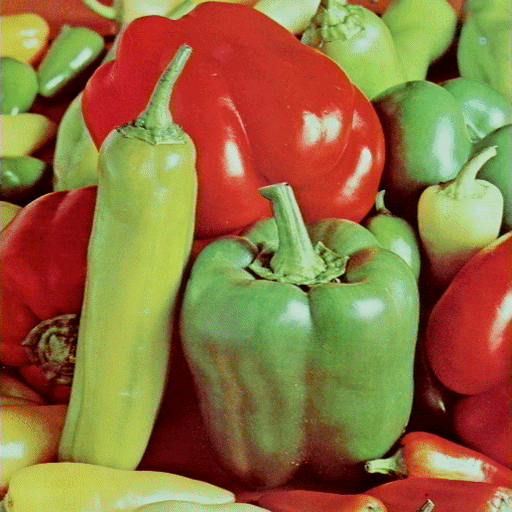

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/set-1-q1.tif")
cv2_imshow(image)

Median Filter

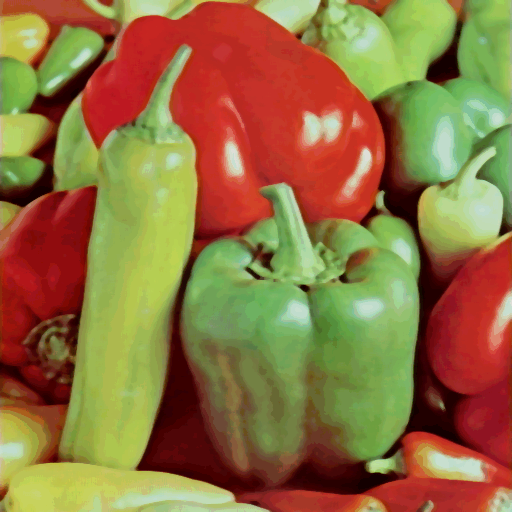

In [2]:
# Built-in
median_filtered_image = cv2.medianBlur(image, 5)
cv2_imshow(median_filtered_image)

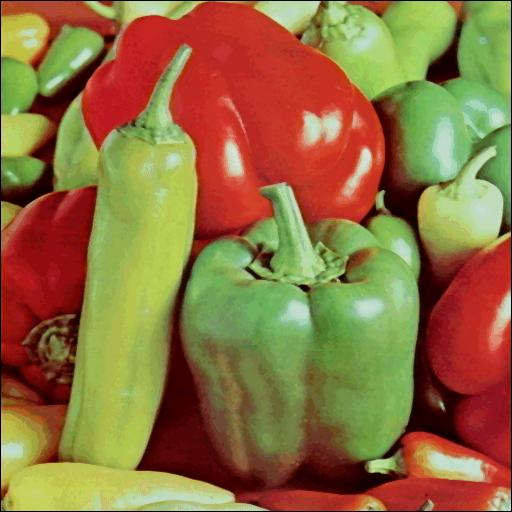

In [8]:
# user defined

def custom_median_filter(image, filter_size):
    filtered_image = np.zeros_like(image, dtype=np.uint8)
    edge = filter_size // 2

    for i in range(edge, image.shape[0] - edge):
        for j in range(edge, image.shape[1] - edge):
            for k in range(image.shape[2]):
                # Get the neighborhood for each channel
                neighborhood = image[i - edge:i + edge + 1, j - edge:j + edge + 1, k]
                # find the median
                median_value = np.median(neighborhood)
                # Set the median value to the output image
                filtered_image[i, j, k] = median_value

    return filtered_image

filtered_output = custom_median_filter(image, 3)
cv2.imwrite('filtered_color_output.jpg', filtered_output)
cv2_imshow(filtered_output)


A median filter replaces a pixel's value with the median value of its surrounding window. Preserves edges in images because the median often reflects the true edge intensity even with noisy neighbors.

Min Filter

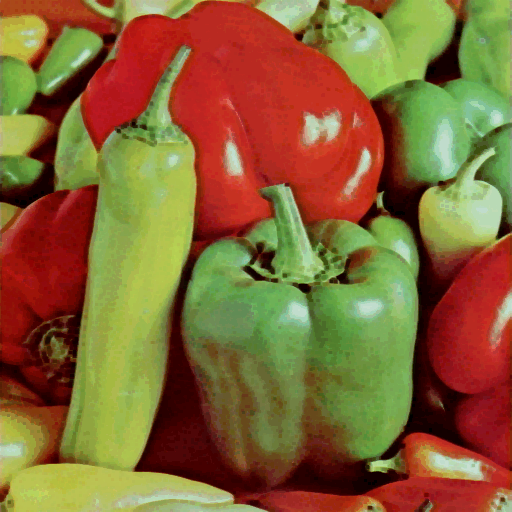

In [11]:
# Built-in
min_image = cv2.erode(image, np.ones((3, 3), np.uint8))
cv2_imshow(min_image)

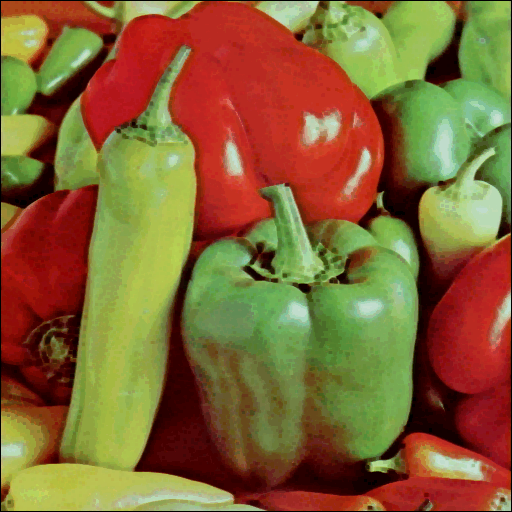

In [13]:
# user defined
def min_filter_image(image, window_size):

  # Get image dimensions
  height, width, channels = image.shape
  # Create empty output image
  filtered_image = np.zeros_like(image)

  for y in range(window_size // 2, height - window_size // 2):
    for x in range(window_size // 2, width - window_size // 2):
      window = []
      for channel in range(channels):
        window.append(image[y - window_size // 2 : y + window_size // 2 + 1,
                             x - window_size // 2 : x + window_size // 2 + 1, channel])
      # Apply min filter on each channel
      filtered_window = [np.min(w) for w in window]
      filtered_image[y, x] = np.array(filtered_window)
  return filtered_image

window_size = 3
filtered_image = min_filter_image(image, window_size)
cv2_imshow(filtered_image)

A min filter replaces a pixel's value with the minimum value within a small surrounding window (neighborhood) of pixels in the image. It reduces the salt-and-pepper noise. This noise appears as random, isolated bright or dark pixels. The min filter replaces these extreme values with closer values from the actual image.

Q2. Edge Detection Second Order Derivative

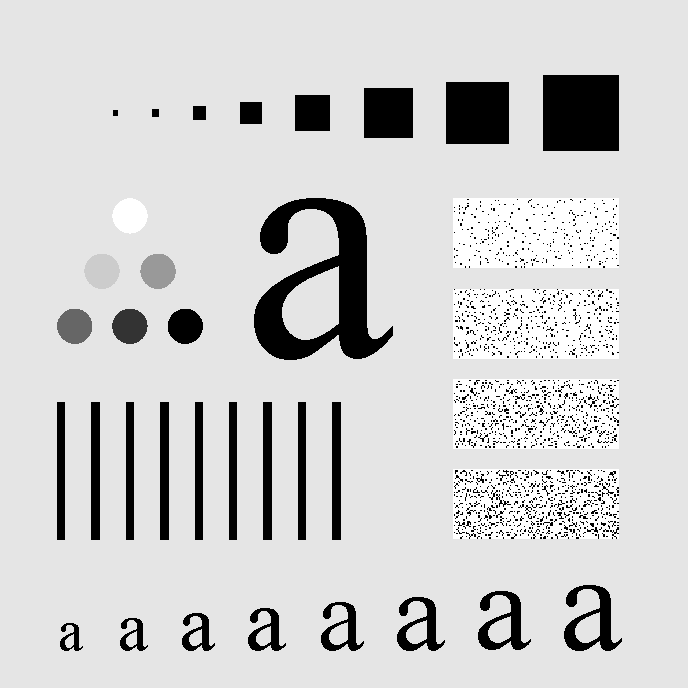

In [14]:
from scipy import ndimage
image1 = cv2.imread("/content/set-1-q2.tif")
cv2_imshow(image1)

Laplacian Operator: It is an edge detector used to compute the second derivatives of an image, measuring the rate at which the first derivatives change. This determines if a change in adjacent pixel values is from an edge or continuous progression.

(-0.5, 687.5, 687.5, -0.5)

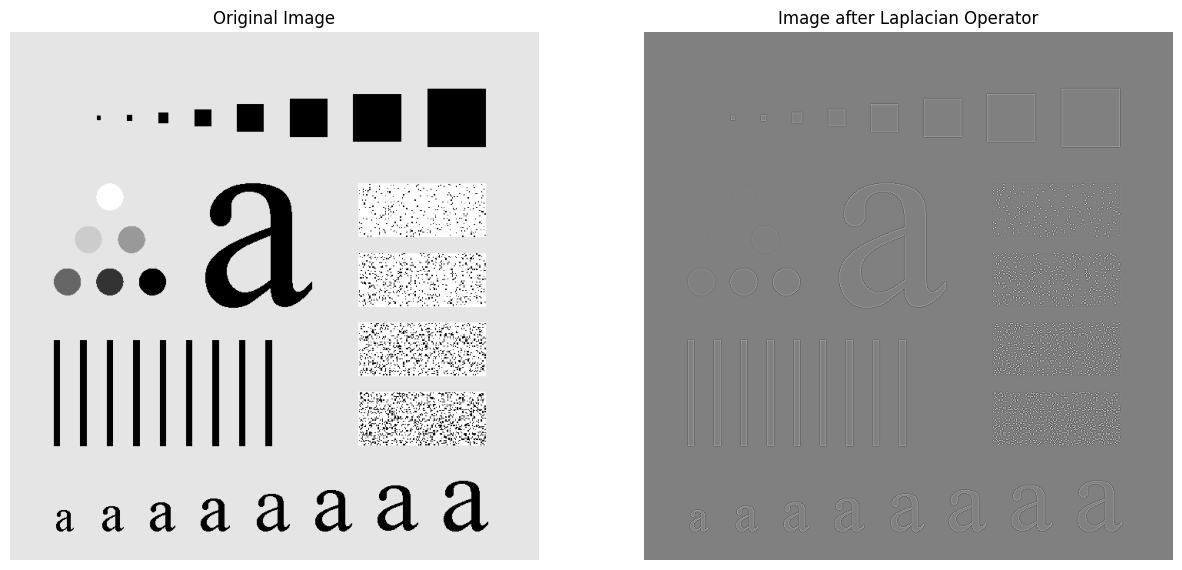

In [17]:
# Apply Laplacian operator
laplacian = cv2.Laplacian(image1, cv2.CV_64F)

# Normalize Laplacian to [0, 255]
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display results
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image1,"gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Image after Laplacian Operator")
plt.imshow(laplacian,"gray")
plt.axis("off")

Laplacian of Gaussian (LoG) filter: It is a edge detection technique that combines Gaussian smoothing with the Laplacian operator to enhance the detection of edges in images

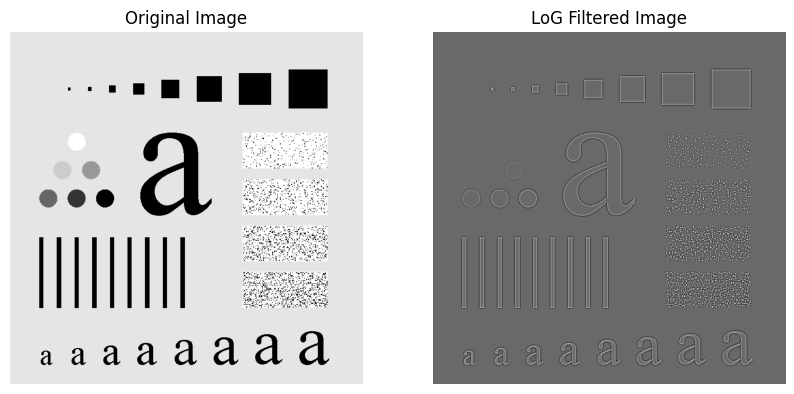

In [19]:
image = cv2.GaussianBlur(image1, (3, 3), 0)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.Laplacian(image_gray, cv2.CV_16S, ksize=3)
# Plot the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(filtered_image,cmap='gray')
plt.title('LoG Filtered Image')
plt.axis('off')
plt.show()


Canny Edge Detection: It is an edge detection algorithm.  It is a multi-stage algorithm and we will go through each stages. Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. It helps in finding Intensity Gradient of the Image

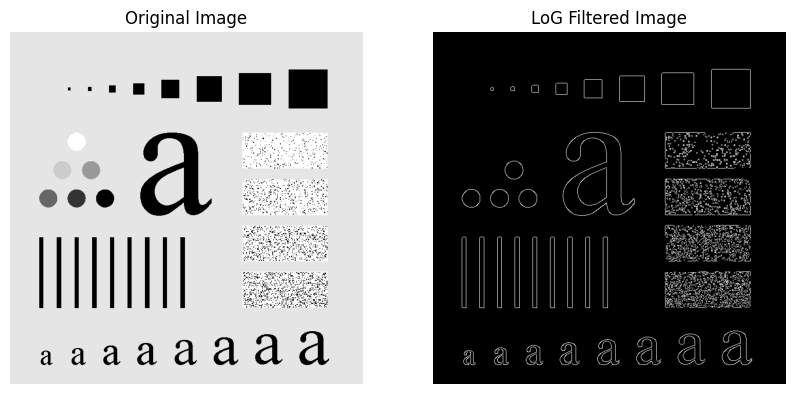

In [20]:
def canny_edge_detector(image, min_threshold, max_threshold):
    edges = cv2.Canny(image, min_threshold, max_threshold)
    return edges

image = cv2.imread('/content/set-1-q2.tif', cv2.IMREAD_GRAYSCALE)
min_threshold = 100
max_threshold = 200
canny_edges = canny_edge_detector(image, min_threshold, max_threshold)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(canny_edges,cmap='gray')
plt.title('LoG Filtered Image')
plt.axis('off')
plt.show()